In [33]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.neighbors import NearestCentroid
import matplotlib.pyplot as plt
import json

In [34]:
# Function to normalize stopping locations

def normalize_stoppings(stoppings):
    scalar = StandardScaler()
    normalized_stoppings = scalar.fit_transform(stoppings)
    return normalized_stoppings

In [35]:
# Function to cluster stopping locations using DBSCAN

def clusterStopping(stoppings, eps=0.5, min_samples=5):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(stoppings)
    return labels

In [36]:
with open('jsonFiles/stoppingandpackage.json', 'r') as f:
    data = json.load(f)

stop_location_dict = {
    stop["stop_id"]: stop["location"]
    for stop in data
}



In [37]:
stoppings = list(stop_location_dict.values())
stoppings = np.array(stoppings, dtype=float)


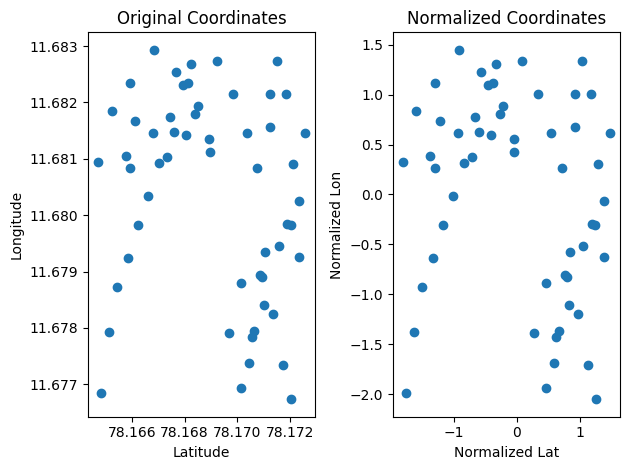

In [38]:
normalizedStoppings = normalize_stoppings(stoppings)
plt.subplot(1,2,2)
plt.scatter(normalizedStoppings[:,0], normalizedStoppings[:,1])
plt.title("Normalized Coordinates")
plt.xlabel("Normalized Lat")
plt.ylabel("Normalized Lon")

plt.subplot(1,2,1)
plt.scatter(stoppings[:,0], stoppings[:,1])
plt.title("Original Coordinates")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.tight_layout()
plt.show()

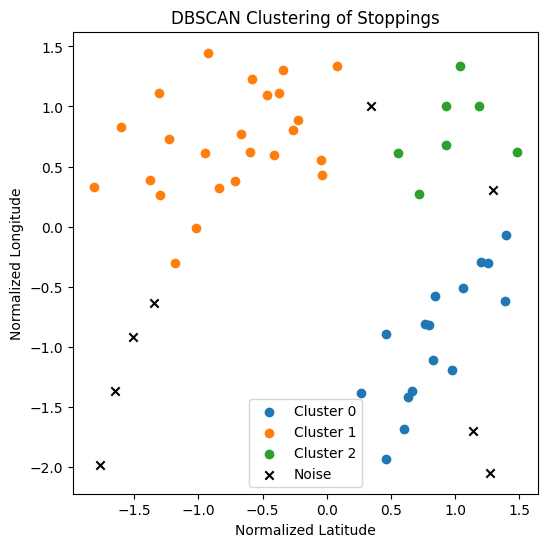

In [39]:
labels = clusterStopping(normalizedStoppings)

plt.figure(figsize=(6,6))

unique_labels = set(labels)

for label in unique_labels:
    mask = labels == label

    if label == -1:
        plt.scatter(
            normalizedStoppings[mask, 0],
            normalizedStoppings[mask, 1],
            c='black',
            marker='x',
            label='Noise'
        )
    else:
        plt.scatter(
            normalizedStoppings[mask, 0],
            normalizedStoppings[mask, 1],
            label=f'Cluster {label}'
        )

    

plt.xlabel("Normalized Latitude")
plt.ylabel("Normalized Longitude")
plt.title("DBSCAN Clustering of Stoppings")
plt.legend()
plt.show()

In [40]:
def mergeNoiceWithNearestCluster(normalizedStoppings, labels):
    noise_mask = labels == -1
    cluster_mask = labels != -1

    centroids = NearestCentroid().fit(
        normalizedStoppings[cluster_mask],
        labels[cluster_mask]
    )

    noise_points = normalizedStoppings[noise_mask]
    if len(noise_points) > 0:
        nearest_clusters = centroids.predict(noise_points)
        labels[noise_mask] = nearest_clusters

    return labels


In [41]:
labels = mergeNoiceWithNearestCluster(normalizedStoppings, labels)
print(labels)

[2 0 2 0 0 1 1 1 1 1 2 0 2 0 0 1 1 1 1 1 0 0 0 1 1 0 0 2 2 0 0 0 1 1 1 1 1
 1 1 1 1 1 0 1 2 2 2 0 0 0 0 1 1 1 1]


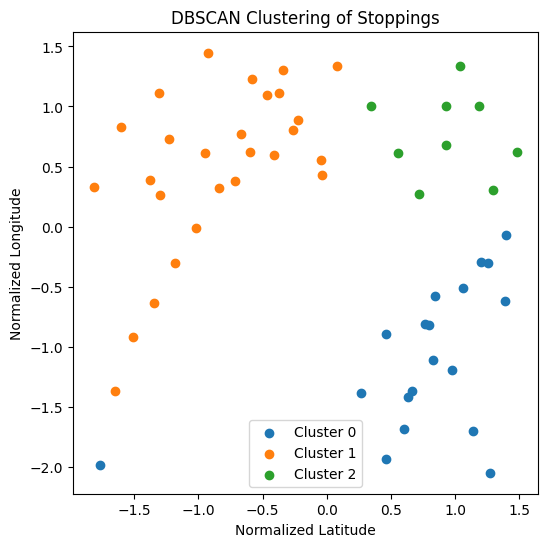

In [42]:
plt.figure(figsize=(6,6))

unique_labels = set(labels)

for label in unique_labels:
    mask = labels == label

    if label == -1:
        plt.scatter(
            normalizedStoppings[mask, 0],
            normalizedStoppings[mask, 1],
            c='black',
            marker='x',
            label='Noise'
        )
    else:
        plt.scatter(
            normalizedStoppings[mask, 0],
            normalizedStoppings[mask, 1],
            label=f'Cluster {label}'
        )

    

plt.xlabel("Normalized Latitude")
plt.ylabel("Normalized Longitude")
plt.title("DBSCAN Clustering of Stoppings")
plt.legend()
plt.show()

In [45]:
import json

with open("jsonFiles/stoppingandpackage.json", "r") as f:
    data = json.load(f)

packageDetails = {
    pkg["package_id"]: {
        "weight": pkg["weight"],
        "floor": pkg["floor"],
        "has_elevator": pkg["has_elevator"],
        "height": pkg["height"],
        "width": pkg["width"],
        "breadth": pkg["breadth"]
    }
    for stop in data
    for pkg in stop["packages"]
}

print(packageDetails)


{'S0_P1': {'weight': 1.2, 'floor': 2, 'has_elevator': True, 'height': 15, 'width': 10, 'breadth': 10}, 'S0_P2': {'weight': 4.6, 'floor': 4, 'has_elevator': False, 'height': 30, 'width': 25, 'breadth': 20}, 'S1_P1': {'weight': 7.8, 'floor': 1, 'has_elevator': True, 'height': 50, 'width': 40, 'breadth': 40}, 'S2_P1': {'weight': 2.1, 'floor': 0, 'has_elevator': False, 'height': 20, 'width': 20, 'breadth': 15}, 'S3_P1': {'weight': 0.5, 'floor': 3, 'has_elevator': True, 'height': 10, 'width': 10, 'breadth': 5}, 'S3_P2': {'weight': 12.4, 'floor': 3, 'has_elevator': True, 'height': 60, 'width': 60, 'breadth': 50}, 'S4_P1': {'weight': 3.2, 'floor': 2, 'has_elevator': False, 'height': 25, 'width': 25, 'breadth': 25}, 'S5_P1': {'weight': 5.5, 'floor': 5, 'has_elevator': True, 'height': 35, 'width': 30, 'breadth': 30}, 'S6_P1': {'weight': 1.1, 'floor': 1, 'has_elevator': True, 'height': 12, 'width': 12, 'breadth': 12}, 'S6_P2': {'weight': 0.8, 'floor': 1, 'has_elevator': True, 'height': 10, 'widt

In [47]:
with open("jsonFiles/packageDetails.json" , "w") as f:
    json.dump(packageDetails , f , indent=4)
